Employee turn-over (also known as “employee churn”) is a costly problem for companies. The true cost of replacing an employee can often be quite large.

A study by the Center for American Progress found that companies typically pay about one-fifth of an employee’s salary to replace that employee, and the cost can significantly increase if executives or highest-paid employees are to be replaced.

In other words, the cost of replacing employees for most employers remains significant. This is due to the amount of time spent to interview and find a replacement, sign-on bonuses, and the loss of productivity for several months while the new employee gets accustomed to the new role.

Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as possibly planning new hiring in advance. I will be using a step-by-step systematic approach using a method that could be used for a variety of ML problems. This project would fall under what is commonly known as HR Analytics or People Analytics.

Lets start with our analysis on predicting the attrition of employees for a well known organisation struggling to keep the attrition rate stable.

Importing the necessary libraries to perform data analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings

pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_colwidth',1000)

In [3]:
# Importing the dataset using pandas library
df=pd.read_csv('Employee_Performance.csv')

1. Department wise performances.
- Top 3 Important Factors affecting employee performance.
- A trained model which can predict whether to hire employees.
- Recommendations to improve employee performance based on insights from analysis.

In [4]:
# Analysing the data to get an idea about the data 
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


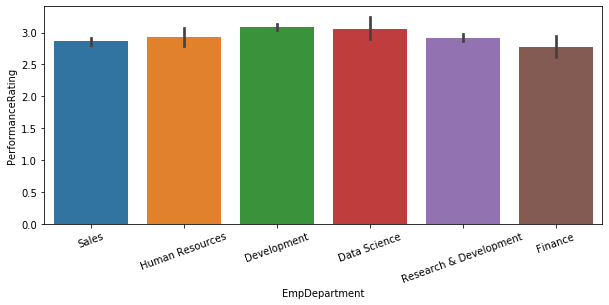

In [5]:
#1. Plotting department wise performance using barplot
plt.figure(figsize=(10,4))
sns.barplot(x=df['EmpDepartment'],y=df['PerformanceRating'])
plt.xticks(rotation=20)
plt.show()

We can see that the Development team and the Data Science team are the highest performing team in the organisation

In [6]:
# Shape of the dataframe
df.shape

(1200, 28)

In [7]:
# Describing the dataframe. Both object and integer type of features are described.
df.describe(include='all')

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
count,1200,1200.000000,1200,1200,1200,1200,1200,1200,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200,1200.000000
unique,1200,NaN,2,6,3,6,19,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,E1001923,NaN,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
freq,1,NaN,725,492,548,373,270,846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1022,NaN
mean,NaN,36.918333,NaN,NaN,NaN,NaN,NaN,NaN,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,NaN,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,NaN,2.948333
std,NaN,9.087289,NaN,NaN,NaN,NaN,NaN,NaN,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,NaN,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,NaN,0.518866
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,NaN,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000
25%,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,NaN,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,NaN,3.000000
50%,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,NaN,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,NaN,3.000000
75%,NaN,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,NaN,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,NaN,3.000000


In [8]:
# Basic info about the data to identify the datatypes and if there are any null values in it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

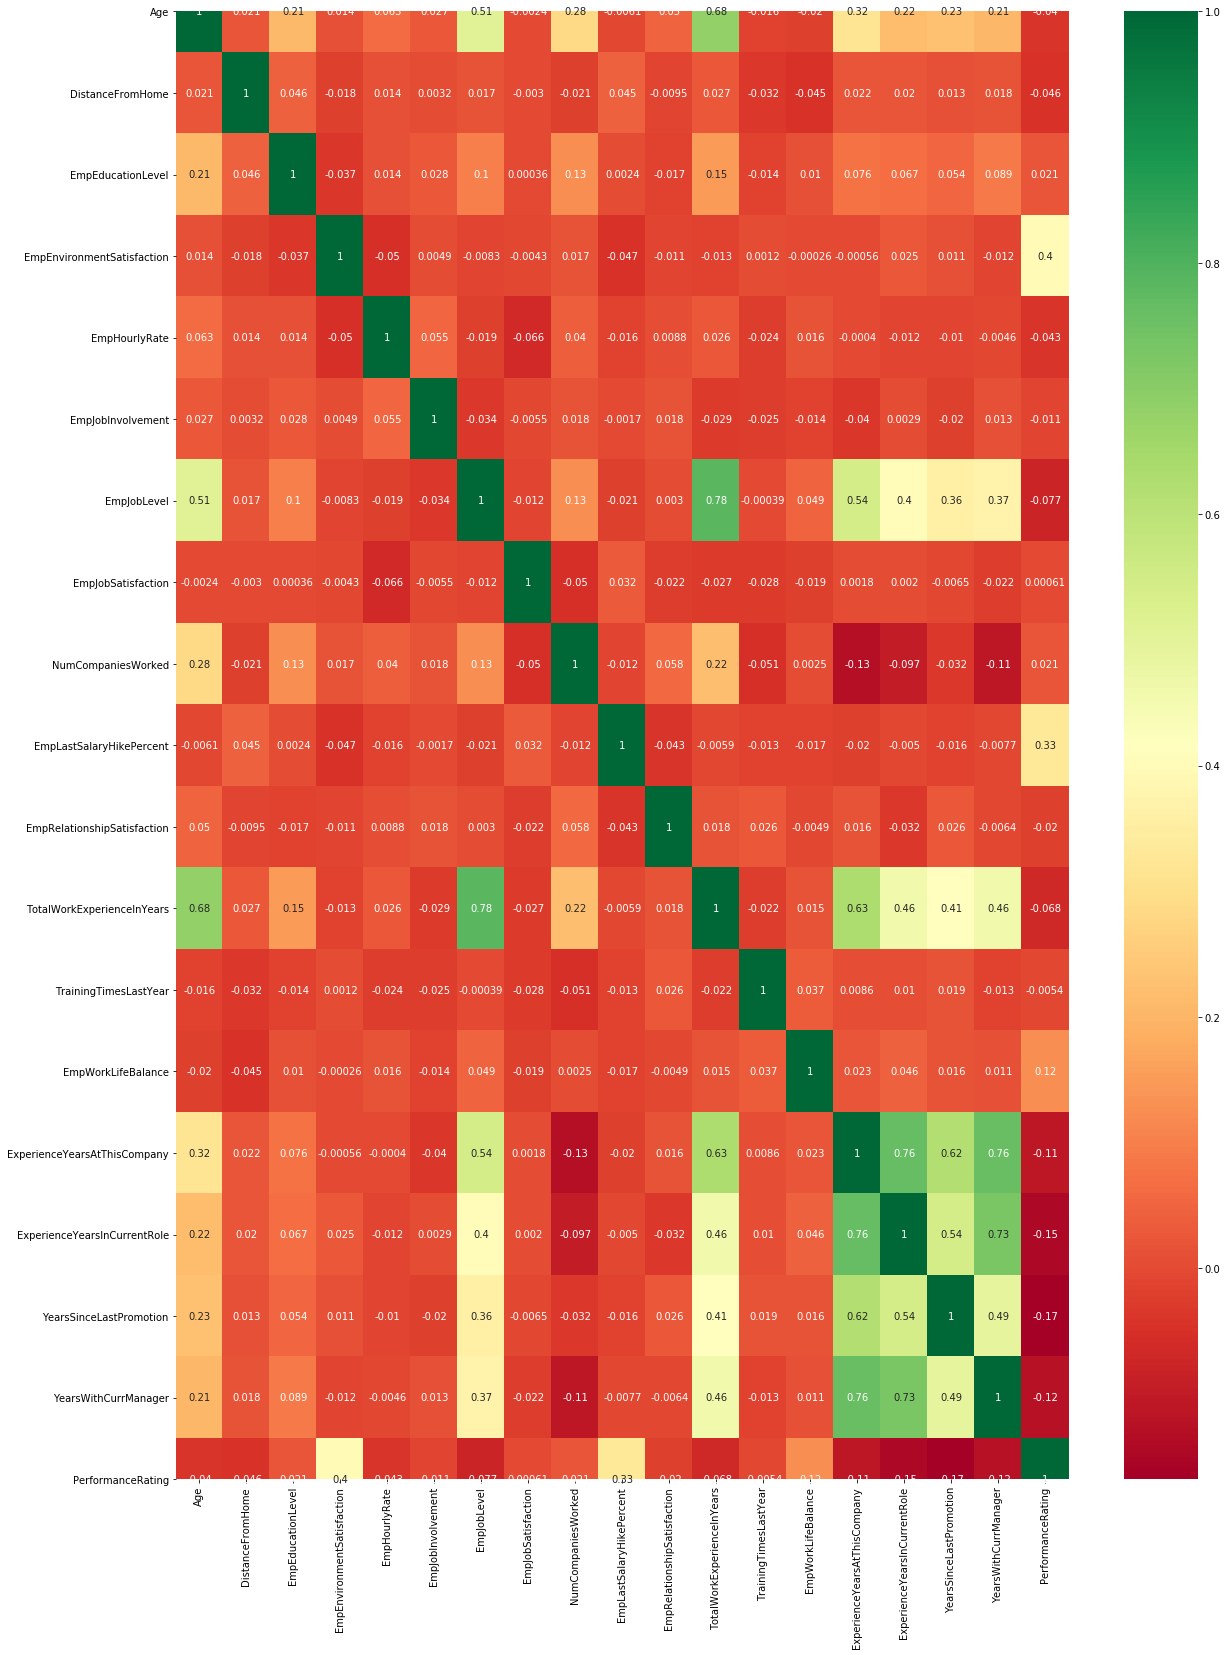

In [9]:
# Visualisaing the data
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,27))
#plotting heat map to find the correlations between different features
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
# Lets drop highly correlated columns
df.drop(['TotalWorkExperienceInYears','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager'],axis= 1,inplace=True)

In [11]:
# Class imbalance check
df['Attrition'].value_counts()

No     1022
Yes     178
Name: Attrition, dtype: int64

We can see there is class imbalance in the data and we will deal with the class imbalance during the modelling stage.

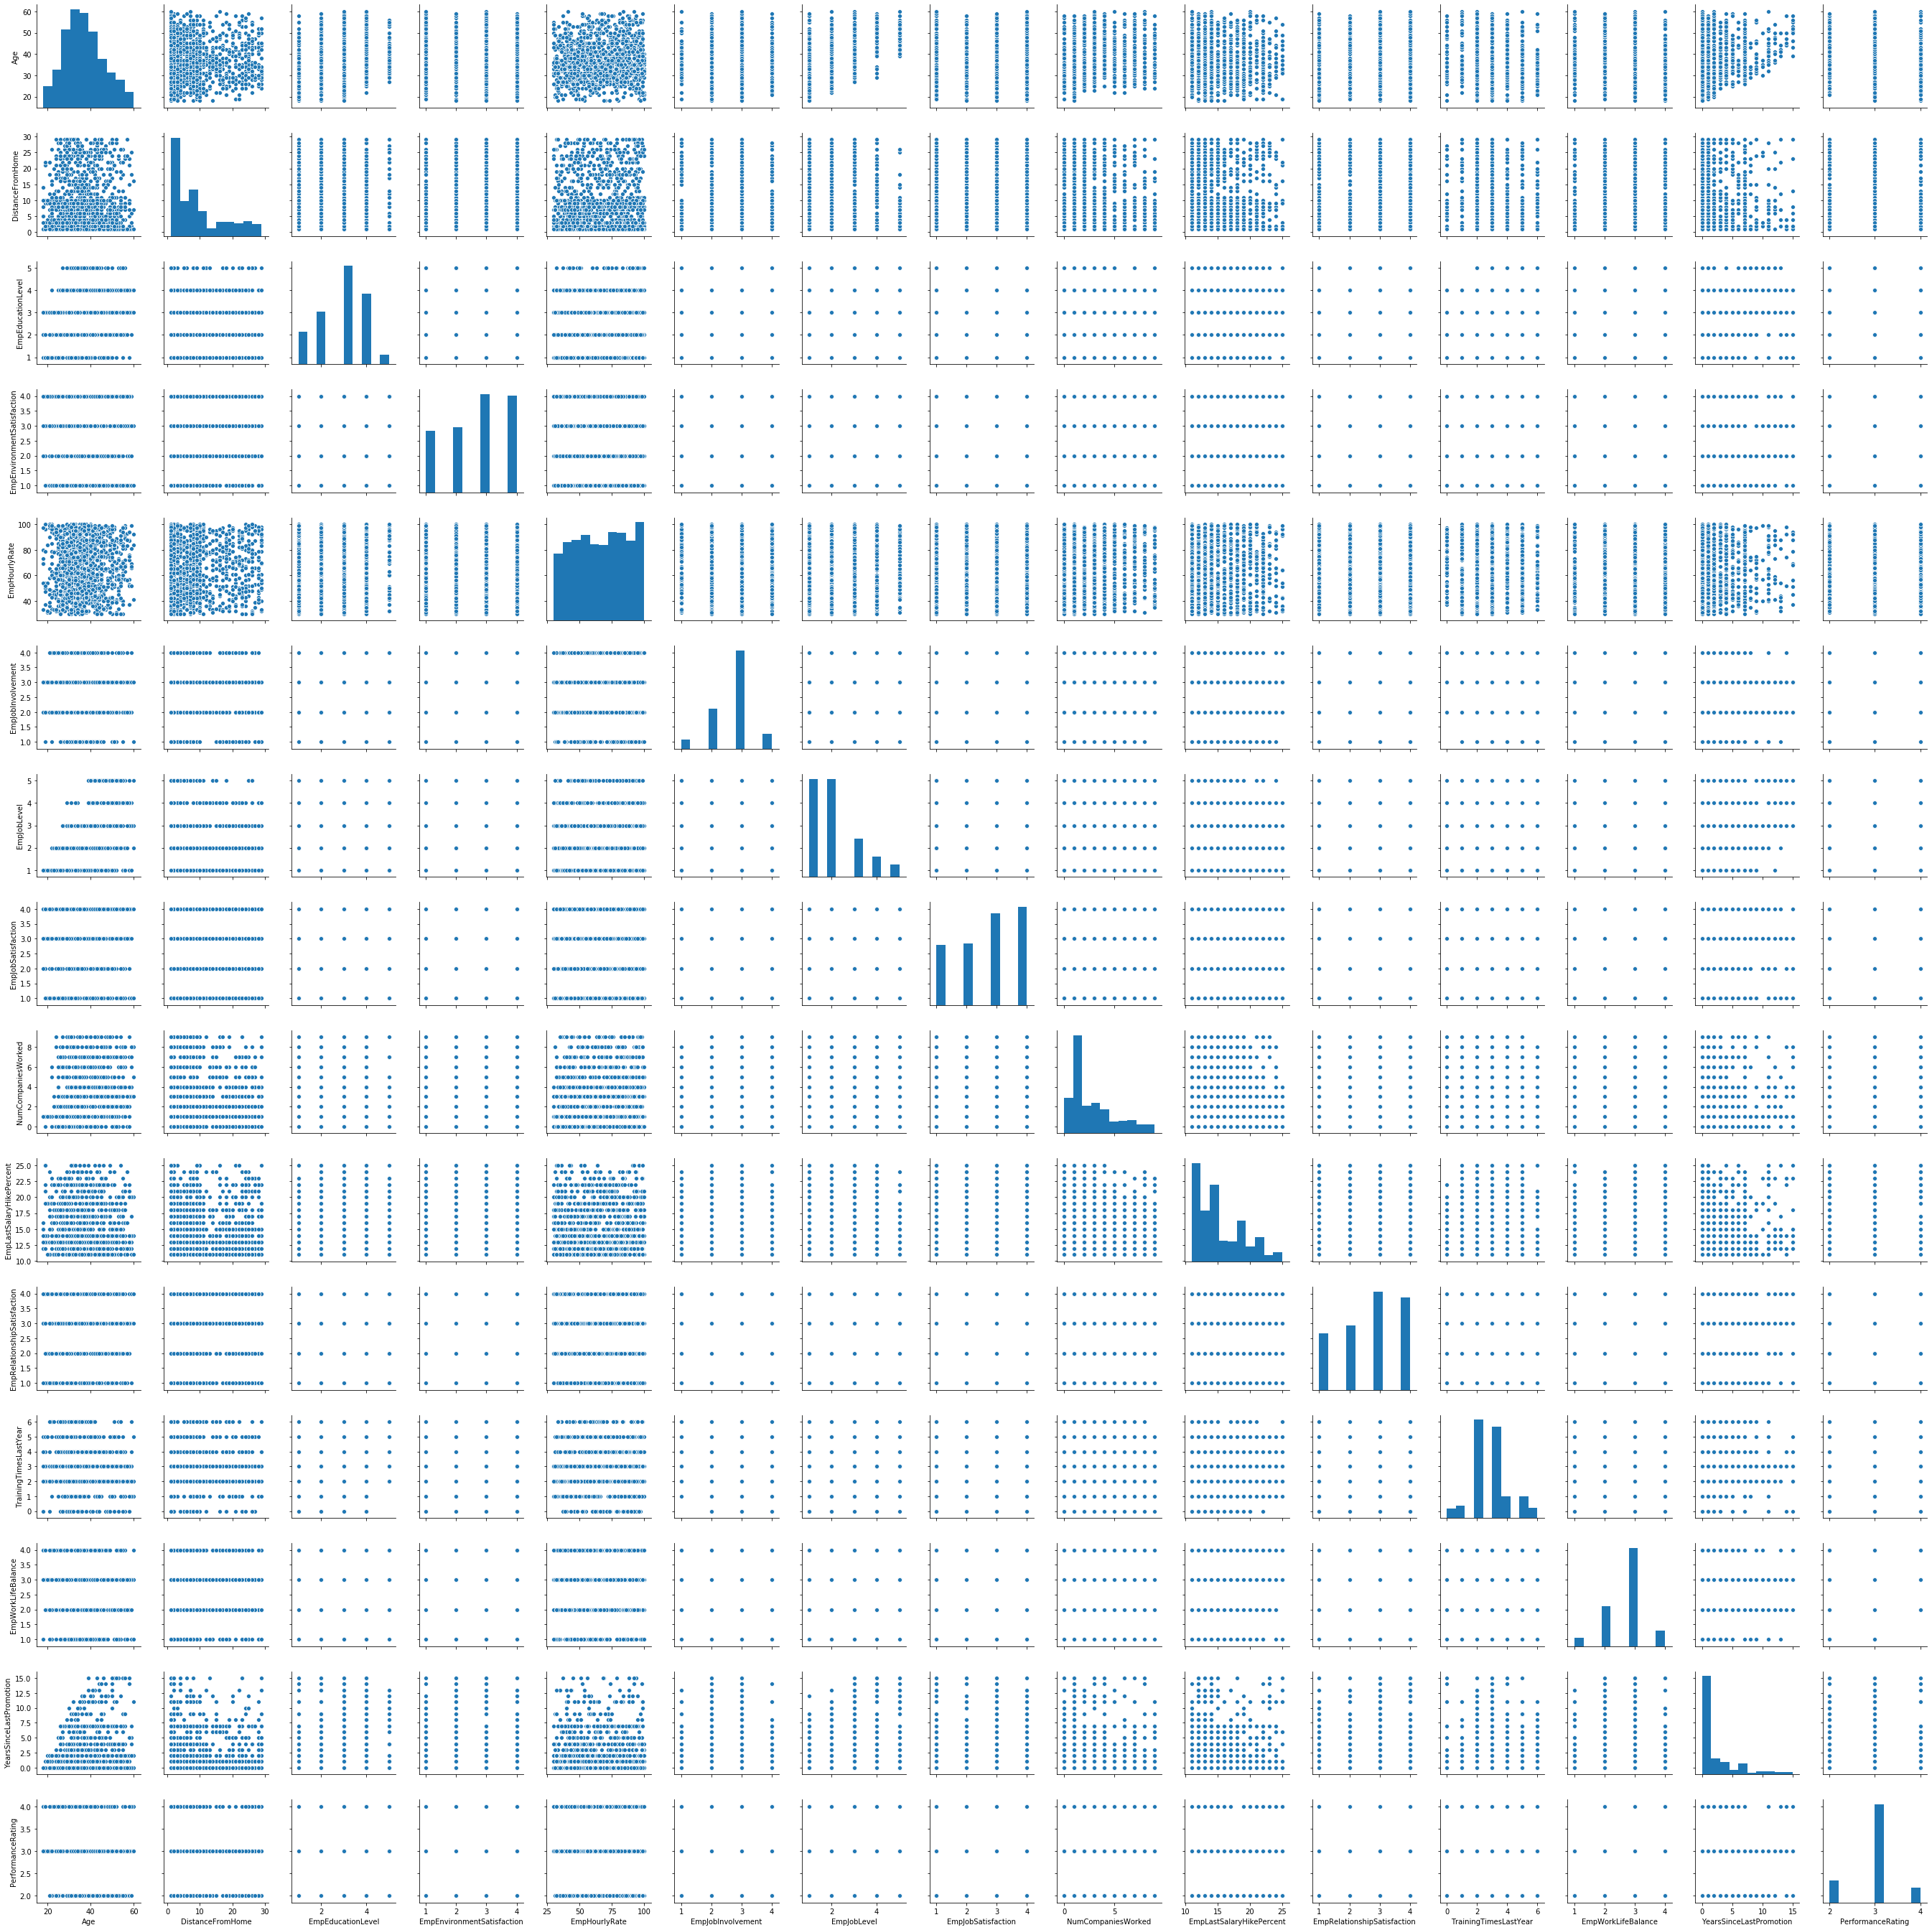

In [12]:
# Plotting pairplot to find the relation of independent features with Dependent features.
sns.pairplot(df,palette="husl")

In [13]:
# Selecting the features in the dataframe which are of Object types
df.select_dtypes(include='object')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,E1001000,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,E1001006,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,E1001007,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,E1001009,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,E1001010,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
...,...,...,...,...,...,...,...,...,...
1195,E100992,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No
1196,E100993,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No
1197,E100994,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No
1198,E100995,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,No,No


In [14]:
# Checking the value counts of the features having the object data type. 
objectdtypes=list(df.select_dtypes(include='object').columns)
objectdtypes.pop(0)
for i in objectdtypes:
    print('Value counts of {0} '.format(i))
    print(df[i].value_counts())
    print('================================')

Value counts of Gender 
Male      725
Female    475
Name: Gender, dtype: int64
Value counts of EducationBackground 
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64
Value counts of MaritalStatus 
Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64
Value counts of EmpDepartment 
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64
Value counts of EmpJobRole 
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources  

In [15]:
# Checking the value counts of the features having the integer data type. These features are stored in a variable named dummy_vars.
# Features in Dummy_vars will be used to create dummy features
dummy_vars=[]
for i in objectdtypes:
    if len(df[i].value_counts())>2:
        print('Value counts of {0} : '.format(i),len(df[i].value_counts()))
        print('================================')
        dummy_vars.append(i)

Value counts of EducationBackground :  6
Value counts of MaritalStatus :  3
Value counts of EmpDepartment :  6
Value counts of EmpJobRole :  19
Value counts of BusinessTravelFrequency :  3


In [16]:
# Checking the value counts of the features having the integer data type. These features are stored in a variable named map_vars.
# Features in map_vars will be used to map with binary values
map_vars=[]
for i in objectdtypes:
    if len(df[i].value_counts())<3:
        print('Value counts of {0} : '.format(i),len(df[i].value_counts()))
        print('================================')
        map_vars.append(i)
print(map_vars)

Value counts of Gender :  2
Value counts of OverTime :  2
Value counts of Attrition :  2
['Gender', 'OverTime', 'Attrition']


In [17]:
# Function to map featues having binary values.
def binary_map(x):
    return x.map({"Yes":1, "No":0,"Male":1,"Female":0})
df[map_vars]=df[map_vars].apply(binary_map)

In [18]:
# Print Employee Attrition Ratio
print("Employee Attrition Ratio:")
print(df['Attrition'].value_counts()*100/df.shape[0])

Employee Attrition Ratio:
0    85.166667
1    14.833333
Name: Attrition, dtype: float64


In [19]:
# Having a look at the dataframe after performing the mapping of categorical features having binary values. 
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TrainingTimesLastYear,EmpWorkLifeBalance,YearsSinceLastPromotion,Attrition,PerformanceRating
0,E1001000,32,1,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,0,12,4,2,2,0,0,3
1,E1001006,47,1,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,0,12,4,2,3,1,0,3
2,E1001007,40,1,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,1,21,3,2,3,1,0,4
3,E1001009,41,1,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,0,15,2,2,2,12,0,3
4,E1001010,60,1,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,0,14,4,1,3,2,0,3


In [20]:
# Dummy encoding the features which are of categorical in nature and having unque values more than 2
EducationBackground=pd.get_dummies(df['EducationBackground'],drop_first=True,prefix='DM_EDU_BKG',prefix_sep='-').reset_index(drop=True)
MaritalStatus=pd.get_dummies(df['MaritalStatus'],drop_first=True,prefix='DM_MaritalStatus',prefix_sep='-').reset_index(drop=True)
EmpDepartment=pd.get_dummies(df['EmpDepartment'],drop_first=True,prefix='DM_Dept',prefix_sep='-').reset_index(drop=True)
EmpJobRole=pd.get_dummies(df['EmpJobRole'],drop_first=True,prefix='DM_JobRole',prefix_sep='-').reset_index(drop=True)
BusinessTravelFrequency=pd.get_dummies(df['BusinessTravelFrequency'],drop_first=True,prefix='DM_TraFreq',prefix_sep='-').reset_index(drop=True)

In [21]:
# Dropping the original fetures which were used to create dummy features and concating the dummy features into the main dataframe thatis df.
df=df.drop(df[dummy_vars].columns,axis=1)
df=pd.concat([df,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency],axis=1)

In [22]:
# After concating having a look at the data frame. We can see all the data here is of numeric in nature.
df.head()

,EmpNumber,Age,Gender,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TrainingTimesLastYear,EmpWorkLifeBalance,YearsSinceLastPromotion,Attrition,PerformanceRating,DM_EDU_BKG-Life Sciences,DM_EDU_BKG-Marketing,DM_EDU_BKG-Medical,DM_EDU_BKG-Other,DM_EDU_BKG-Technical Degree,DM_MaritalStatus-Married,DM_MaritalStatus-Single,DM_Dept-Development,DM_Dept-Finance,DM_Dept-Human Resources,DM_Dept-Research & Development,DM_Dept-Sales,DM_JobRole-Data Scientist,DM_JobRole-Delivery Manager,DM_JobRole-Developer,DM_JobRole-Finance Manager,DM_JobRole-Healthcare Representative,DM_JobRole-Human Resources,DM_JobRole-Laboratory Technician,DM_JobRole-Manager,DM_JobRole-Manager R&D,DM_JobRole-Manufacturing Director,DM_JobRole-Research Director,DM_JobRole-Research Scientist,DM_JobRole-Sales Executive,DM_JobRole-Sales Representative,DM_JobRole-Senior Developer,DM_JobRole-Senior Manager R&D,DM_JobRole-Technical Architect,DM_JobRole-Technical Lead,DM_TraFreq-Travel_Frequently,DM_TraFreq-Travel_Rarely
0,E1001000,32,1,10,3,4,55,3,2,4,1,0,12,4,2,2,0,0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,E1001006,47,1,14,4,4,42,3,2,1,2,0,12,4,2,3,1,0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,E1001007,40,1,5,4,4,48,2,3,1,5,1,21,3,2,3,1,0,4,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,E1001009,41,1,10,4,2,73,2,5,4,3,0,15,2,2,2,12,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,E1001010,60,1,16,4,1,84,3,2,1,8,0,14,4,1,3,2,0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [23]:
# Storing the employeenumber into a separate variable for future purpose. We will use this variable at the time of predicting the employees who are going to leave the organisation.
df_EmpNumber=df.pop('EmpNumber')

In [24]:
# Having a look at the dataframe after performing all the requred data cleaning operations 
df.head()

,Age,Gender,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TrainingTimesLastYear,EmpWorkLifeBalance,YearsSinceLastPromotion,Attrition,PerformanceRating,DM_EDU_BKG-Life Sciences,DM_EDU_BKG-Marketing,DM_EDU_BKG-Medical,DM_EDU_BKG-Other,DM_EDU_BKG-Technical Degree,DM_MaritalStatus-Married,DM_MaritalStatus-Single,DM_Dept-Development,DM_Dept-Finance,DM_Dept-Human Resources,DM_Dept-Research & Development,DM_Dept-Sales,DM_JobRole-Data Scientist,DM_JobRole-Delivery Manager,DM_JobRole-Developer,DM_JobRole-Finance Manager,DM_JobRole-Healthcare Representative,DM_JobRole-Human Resources,DM_JobRole-Laboratory Technician,DM_JobRole-Manager,DM_JobRole-Manager R&D,DM_JobRole-Manufacturing Director,DM_JobRole-Research Director,DM_JobRole-Research Scientist,DM_JobRole-Sales Executive,DM_JobRole-Sales Representative,DM_JobRole-Senior Developer,DM_JobRole-Senior Manager R&D,DM_JobRole-Technical Architect,DM_JobRole-Technical Lead,DM_TraFreq-Travel_Frequently,DM_TraFreq-Travel_Rarely
0,32,1,10,3,4,55,3,2,4,1,0,12,4,2,2,0,0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,47,1,14,4,4,42,3,2,1,2,0,12,4,2,3,1,0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,40,1,5,4,4,48,2,3,1,5,1,21,3,2,3,1,0,4,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,41,1,10,4,2,73,2,5,4,3,0,15,2,2,2,12,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,60,1,16,4,1,84,3,2,1,8,0,14,4,1,3,2,0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [25]:
# We will now proceed with the scaling and train_test_split operations
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

In [26]:
# Segregating the numeric features to perform the scaling on it. We will only use these numerical features to perform scaling
num_vars=['Age','DistanceFromHome','EmpEducationLevel','EmpEnvironmentSatisfaction','EmpHourlyRate','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction','NumCompaniesWorked','OverTime','EmpLastSalaryHikePercent','EmpRelationshipSatisfaction','TrainingTimesLastYear','EmpWorkLifeBalance','YearsSinceLastPromotion','PerformanceRating']
df[num_vars]=scaler.fit_transform(df[num_vars])
df.head()

,Age,Gender,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TrainingTimesLastYear,EmpWorkLifeBalance,YearsSinceLastPromotion,Attrition,PerformanceRating,DM_EDU_BKG-Life Sciences,DM_EDU_BKG-Marketing,DM_EDU_BKG-Medical,DM_EDU_BKG-Other,DM_EDU_BKG-Technical Degree,DM_MaritalStatus-Married,DM_MaritalStatus-Single,DM_Dept-Development,DM_Dept-Finance,DM_Dept-Human Resources,DM_Dept-Research & Development,DM_Dept-Sales,DM_JobRole-Data Scientist,DM_JobRole-Delivery Manager,DM_JobRole-Developer,DM_JobRole-Finance Manager,DM_JobRole-Healthcare Representative,DM_JobRole-Human Resources,DM_JobRole-Laboratory Technician,DM_JobRole-Manager,DM_JobRole-Manager R&D,DM_JobRole-Manufacturing Director,DM_JobRole-Research Director,DM_JobRole-Research Scientist,DM_JobRole-Sales Executive,DM_JobRole-Sales Representative,DM_JobRole-Senior Developer,DM_JobRole-Senior Manager R&D,DM_JobRole-Technical Architect,DM_JobRole-Technical Lead,DM_TraFreq-Travel_Frequently,DM_TraFreq-Travel_Rarely
0,-0.541458,1,0.102061,0.103000,1.177978,-0.543569,0.379608,-0.060955,1.151824,-0.674538,-0.645573,-0.889111,1.185833,-0.622235,-1.064491,-0.681372,0,0.099618,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1.109888,1,0.591464,1.061145,1.177978,-1.187042,0.379608,-0.060955,-1.574386,-0.269410,-0.645573,-0.889111,1.185833,-0.622235,0.365956,-0.370834,0,0.099618,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0.339260,1,-0.509693,1.061145,1.177978,-0.890055,-1.035081,0.842082,-1.574386,0.945974,1.549010,1.594054,0.255768,-0.622235,0.365956,-0.370834,0,2.027702,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0.449349,1,0.102061,1.061145,-0.656641,0.347393,-1.035081,2.648157,1.151824,0.135718,-0.645573,-0.061389,-0.674297,-0.622235,-1.064491,3.045084,0,0.099618,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,2.541054,1,0.836165,1.061145,-1.573950,0.891870,0.379608,-0.060955,-1.574386,2.161359,-0.645573,-0.337297,1.185833,-1.414051,0.365956,-0.060296,0,0.099618,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [27]:
# Splitting the dataframe into X and Y
y=df.pop('Attrition')
X=df

In [28]:
# Performing train_test_split() on the X and y dataframe
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(840, 49)
(840,)
(360, 49)
(360,)


In [30]:
# importing the Extreme Gradient Boost for XGboost classification
from xgboost import XGBClassifier

In [33]:
# Defining the hyper paramters to execute gridsearch cv
from sklearn.model_selection import GridSearchCV
clf = XGBClassifier(learning_rate=0.01, silent=True, objective='binary:logistic')
param_test = {
                'n_estimators': [30,50,100,200,500,1000], 
                'min_samples_leaf':[2,3,4,5,6,7,8,9,10],
                'max_depth': [2,4,6,8,10]
            }
grid_search = GridSearchCV(estimator=clf , param_grid=param_test , scoring='accuracy',cv=5,n_jobs=-1,verbose=1)
grid_search.fit(X_train,y_train)
grid_search.best_params_,
grid_search.best_score_

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  9.2min finished


0.8738095238095237

In [34]:
# We got the best paramters by executing the grid search using different hyperparameters and now we will proceed by 
# applying these parameters 
grid_search.best_params_,

({'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 1000},)

In [35]:
# With best params we execute the XGB classifier and prepare the model
param_test = {
                'n_estimators': [1000], 
                'max_depth': [2]
            }
grid_search = GridSearchCV(estimator=clf , param_grid=param_test , scoring='accuracy',cv=5,n_jobs=-1, verbose=1)
grid_search.fit(X_train,y_train)
grid_search.best_params_,
grid_search.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished


0.8738095238095237

In [36]:
# Using the model prepared we predict the results on the Test data.
predict_data = grid_search.predict(X_test)

In [37]:
# Fetching the importatn features affecting the employees to attrite
model = XGBClassifier()
model.fit(X, y)

# feature importance
print(model.feature_importances_)

[0.0400897  0.01926804 0.02667745 0.01988725 0.03295284 0.02413644
 0.03981229 0.06215442 0.02754454 0.02924873 0.06630128 0.02444231
 0.02817612 0.01938741 0.03347003 0.02133268 0.01820471 0.0162631
 0.03135759 0.02921641 0.         0.02168906 0.02119741 0.05305072
 0.         0.01100633 0.         0.02197145 0.02076875 0.
 0.         0.02238963 0.         0.         0.0169451  0.02018876
 0.         0.         0.         0.         0.01310091 0.04105124
 0.03432398 0.02185301 0.         0.         0.01625039 0.03352766
 0.02076228]


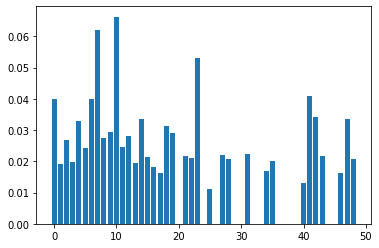

In [38]:
# plotting important features 
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [39]:
# Logistic Regression using Lasso to fetch the important features
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=3)
embeded_lr_selector.fit(X,y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

3 selected features


In [42]:
# Preinting the top 5 features affecting the employee attrition and performance.
print(embeded_lr_feature)

['OverTime', 'DM_MaritalStatus-Single', 'DM_TraFreq-Travel_Frequently']


We can see the important factors for the employee attrition are:
    1. Overtime
    2. Marital Status - Single
    3. Travel Fequency
- Employees who are made to do Overtime and travel a lot might be getting frustrated and depressed by their routine.
- Away from family and traveling to long distances could be the main reason for attrition. Organisation can start focusing on reducing the travel for employees. 
- They could also reduce the working hours for employees who have to travel.
- Incentives can also be provided for number of trips they make. This could keep them motivated.
